In [1]:
workers()

1-element Array{Int64,1}:
 1

In [2]:
addprocs(8);

In [3]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [4]:
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end

n => {0,8192,0,0,0,0}
m => [0.0,0.0001220703125,0.0,0.0,0.0,0.0]
t = read(f,Float64) => 0.10000000000000002
z = read(f,Float64) => 8.999999999999998
z => 8.999999999999998
t => 0.10000000000000002


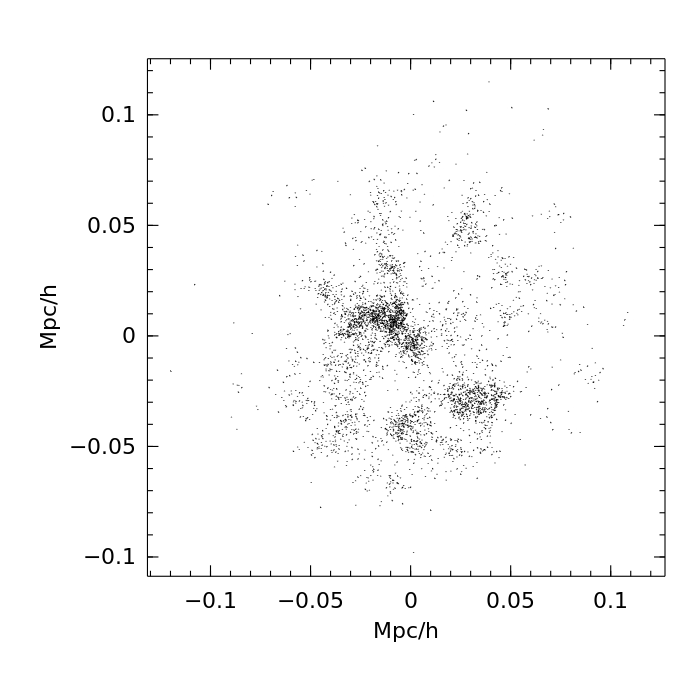

In [5]:
wl = nb.load_G2("/home/skariel/Desktop/Gadget-2.0.7/Gadget2/compare_output/snapshot_004");
Winston.set_default_plot_size(700,700)
nb.plot(wl)

In [6]:
wl.vx[1]

4.953712586896434

In [13]:
wn.vx[1]

4.953712586896433

In [8]:
nb.save_G2(wl, "tst.data", 0.1)

In [9]:
wn = nb.load_G2("tst.data")

n => {0,8192,0,0,0,0}
m => [0.0,0.0001220703125,0.0,0.0,0.0,0.0]
t = read(f,Float64) => 0.1
z = read(f,Float64) => 9.0
z => 9.0
t => 0.1


World{Cosmological}(CompiledOctTree{Particle}([CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0)  …  CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),CompiledOctTreeNode{Particle}(Particle(0.0,0.0,0.0,0.0),0.0,0),Comp

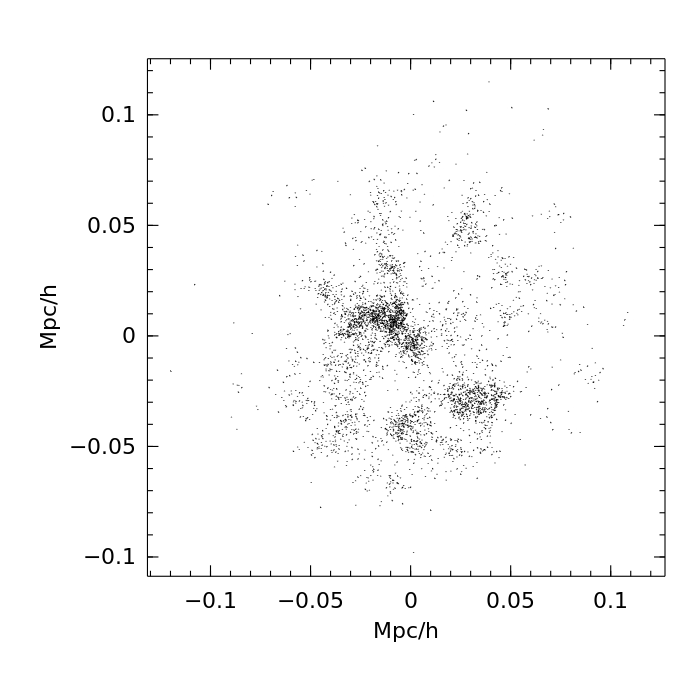

In [12]:
nb.plot(wn)

In [15]:
function f()
    arrX = Float64[]
    arrY = Float64[]
    arrZ = Float64[]
    @inbounds for i in 1:100000000
        si = sqrt(i)
        push!(arrX,si*si*si)
        si = sqrt(2.*i)
        push!(arrY,si*si*si)
        si = sqrt(3.*i)
        push!(arrZ,si*si*si)
    end
    sum(arrX)+sum(arrY)+sum(arrZ)
end

f (generic function with 1 method)

In [16]:
@time f()

elapsed time: 2.888073718 seconds (9854241960 bytes allocated, 11.52% gc time)


3.609831864104026e20

In [17]:
using OctTrees

In [18]:
using nbody

In [21]:
sizeof(OctTreeNode{nbody.Particle})

144

In [24]:
4.5*144*70e6/1e9

45.36

In [26]:
sizeof(nb.Particle)

32